In [61]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb # Import the CAMB module
from camb.symbolic import *

# CMB Parameter Sensitivity

The Standard Cosmological Model, i. e. the $\Lambda CDM$ model, is based on six foundamental parameters:
- $A_s$: scalar amplitude of the power spectrum of inial curvature;
- $n_s$: scalar spectral index of the power spectrum of inial curvature, which for perfect De Sitter expansion (exponensial growth) would exactly be 1;
- $\tau$: optical depth of the Universe, i.e. it accounts for how likely a photon may scatter in his path;
- $H_0$: value of the Hubble constant at the present epoch;
- $\Omega_bh^2$: baryon density parameter multiplied by the dimensioneless Hubble constant;
- $\Omega_ch^2$: cold dark matter density parameter multiplied by the dimensioneless Hubble constant;

In [62]:
# Set up a new set of parameters for CAMB using Planck 2018 cosmological parameters
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

In [63]:
# Calculate results for these parameters
results = camb.get_results(pars)

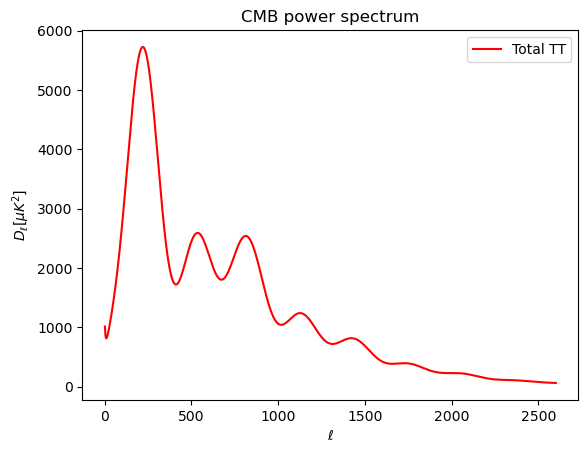

In [64]:
# Plot the CMB temperature power spectrum
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total'] # Get the total CMB power spectrum
ells = np.arange(totCL.shape[0])

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()


Note that TT stands for Temperature - Temperature: it describes how the temperature fluctuations in the CMB are distributed across different angular scales. Essentially, it quantifies the variation in temperature as a function of scale.

Recall that:
$$
D_l = \frac{l(l+1)C_l}{2\pi}
$$

# WARNING

In [65]:
# Monopole and dipole aren't 0 by default????
print('Monopole:', totCL[0,0])
print('Dipole:', totCL[1,0])

Monopole: 0.0
Dipole: 0.0


In [66]:
'''
# Getting all the C_ls for the temperature power spectrum
C_l = results.get_cmb_power_spectra(pars, raw_cl=True)
'''

'\n# Getting all the C_ls for the temperature power spectrum\nC_l = results.get_cmb_power_spectra(pars, raw_cl=True)\n'

In [67]:
'''
C_ls = C_l['total']

# Plotting the C_ls
plt.figure()
plt.plot(ells, C_ls[:,0], label='TT')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.title('CMB power spectrum')
plt.show()
'''

"\nC_ls = C_l['total']\n\n# Plotting the C_ls\nplt.figure()\nplt.plot(ells, C_ls[:,0], label='TT')\nplt.legend()\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$C_{\\ell}$')\nplt.title('CMB power spectrum')\nplt.show()\n"

In [68]:
# Contribution from ISW effect
pars1 = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

pars1.SourceTerms.counts_ISW = False

In [69]:
results1 = camb.get_results(pars1)
powers1 = results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
totCL1=powers1['total'] # Get the total CMB power spectrum

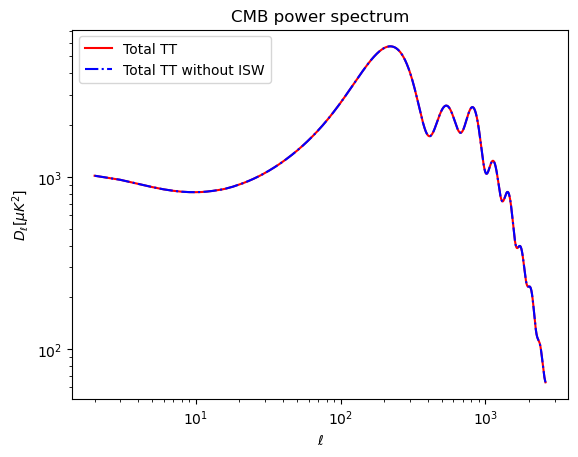

In [70]:
# Plot the CMB power spectrum VS the one without ISW effect
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') 
plt.plot(ells[2:],totCL1[2:,0], color='b',ls = '-.',label='Total TT without ISW')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [71]:
# Monopole, dipole and ISW effects
monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

In [72]:
early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data = camb.get_results(pars)
dic  = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

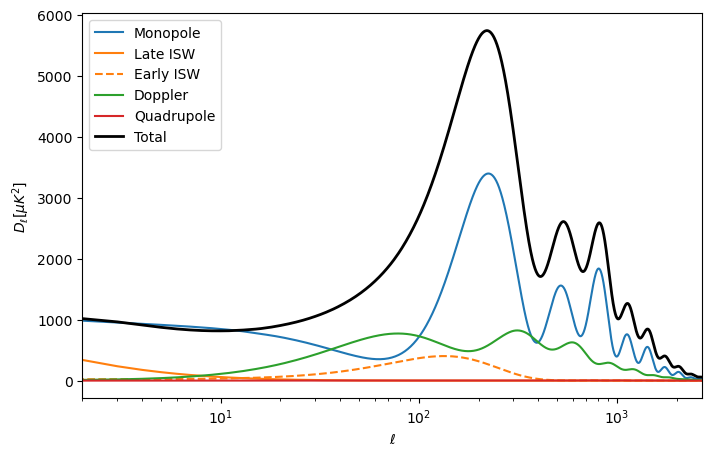

In [73]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='C1')
plt.semilogx(ls,dic['dopxdop'],color='C2')
plt.semilogx(ls,dic['QxQ'], color='C3')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

# Variotion of Parameters

In [74]:
# Defining the standard set of parameters with Planck 2018 cosmological parameters
std_pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

# Calculate results for these parameters
std_results = camb.get_results(std_pars)

# Computing the CMB power spectrum
std_powers = std_results.get_cmb_power_spectra(std_pars, CMB_unit='muK')
std_totCL=std_powers['total'] # Get the total CMB power spectrum
ells = np.arange(std_totCL.shape[0]) # Get the list of multipoles


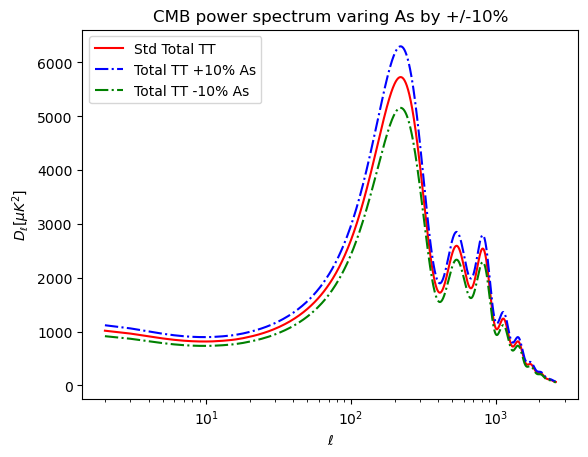

In [75]:
# Variang As by +/-10%
As_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_plus.InitPower.As *= 110./100.
As_pars_minus.InitPower.As *= 90./100.

# Calculate results for these parameters
As_results_plus = camb.get_results(As_pars_plus)
As_results_minus = camb.get_results(As_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
var_powers_plus = As_results_plus.get_cmb_power_spectra(As_pars_plus, CMB_unit='muK')
var_powers_minus = As_results_minus.get_cmb_power_spectra(As_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
var_totCL_plus = var_powers_plus['total']
var_totCL_minus = var_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% As')
plt.plot(ells[2:],var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% As')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing As by +/-10%')
plt.show()

**Varing As in the Power Spectrum:**
varing As, i.e. the scalar amplitude of primordial curvature, just modifies the overall amplitude of the fluctuations of the CMB.

In [76]:
# Monopole, dipole and ISW effects with varying As
As_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)
As_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

As_data_plus = camb.get_results(As_pars_plus)
As_data_minus = camb.get_results(As_pars_minus)

As_dic_plus  = As_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
As_dic_minus = As_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

Text(0.5, 1.0, 'Quadrupole effect')

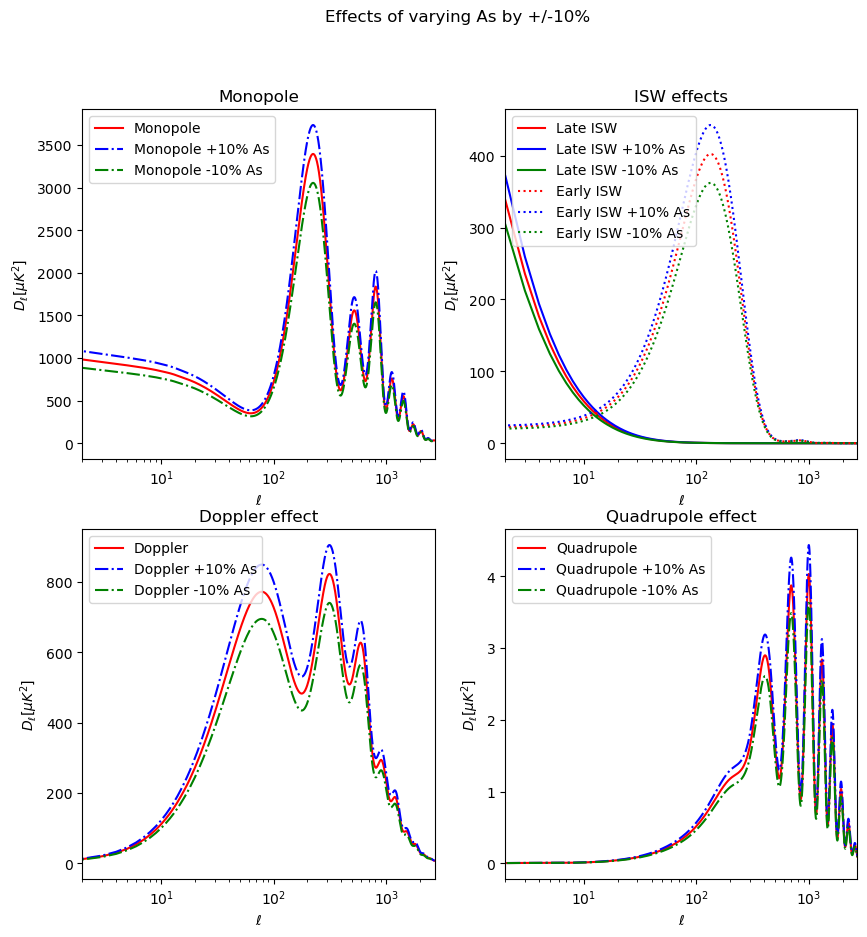

In [93]:
# PLots for the different effects having varied As by +/-10%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying As by +/-10%')
plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,As_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% As','Monopole -10% As'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,As_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,As_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,As_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,As_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% As','Late ISW -10% As','Early ISW','Early ISW +10% As','Early ISW -10% As'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,As_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% As','Doppler -10% As'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,As_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% As','Quadrupole -10% As'], loc = 'upper left')
plt.title('Quadrupole effect')

**Varing As in the different effects of the Power Spectrum:** the previous considerations on the total power spectrum holds.

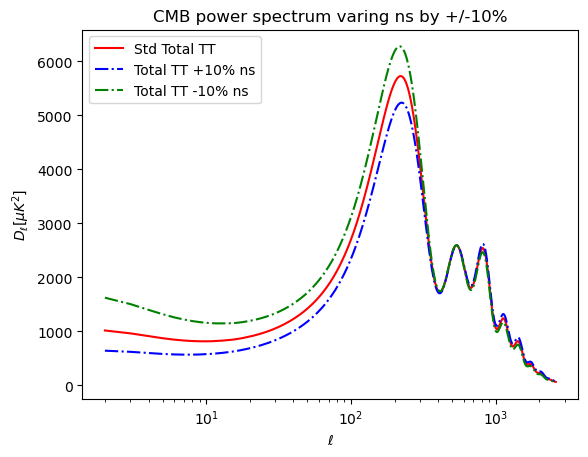

In [78]:
# Variang ns by +/-10%
ns_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
ns_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
ns_pars_plus.InitPower.ns *= 110./100.
ns_pars_minus.InitPower.ns *= 90./100.

# Calculate results for these parameters
ns_results_plus = camb.get_results(ns_pars_plus)
ns_results_minus = camb.get_results(ns_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
ns_powers_plus = ns_results_plus.get_cmb_power_spectra(ns_pars_plus, CMB_unit='muK')
ns_powers_minus = ns_results_minus.get_cmb_power_spectra(ns_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
ns_totCL_plus = ns_powers_plus['total']
ns_totCL_minus = ns_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],ns_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% ns')
plt.plot(ells[2:],ns_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% ns')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing ns by +/-10%')
plt.show()

**Varing ns in the Power Spectrum:** apparently, varing ns varies the relative power on small and large scales.

In [79]:
# PLots for the different effects having varied ns by +/-10%

ns_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
ns_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

ns_data_plus = camb.get_results(ns_pars_plus)
ns_data_minus = camb.get_results(ns_pars_minus)

ns_dic_plus  = ns_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
ns_dic_minus = ns_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

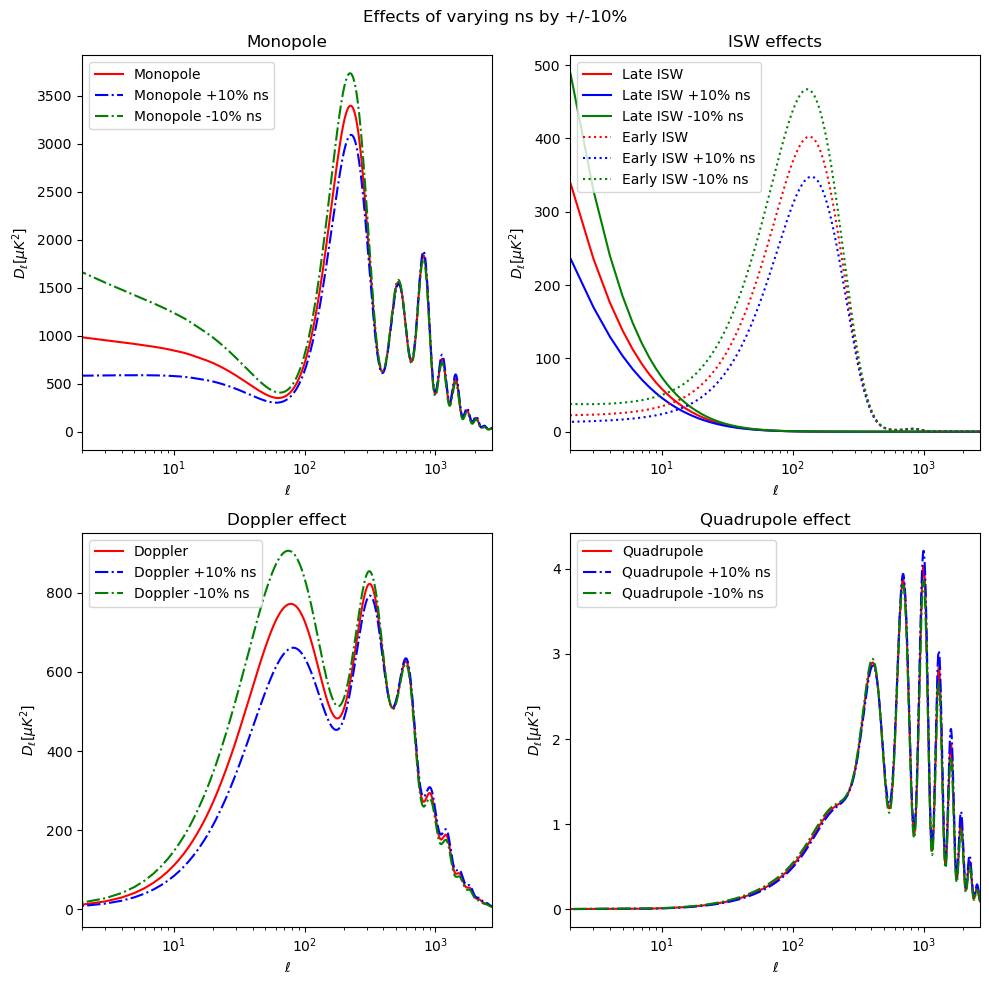

In [91]:
# PLots for the different effects having varied ns by +/-10%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying ns by +/-10%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,ns_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% ns','Monopole -10% ns'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,ns_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,ns_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,ns_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,ns_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% ns','Late ISW -10% ns','Early ISW','Early ISW +10% ns','Early ISW -10% ns'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,ns_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% ns','Doppler -10% ns'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,ns_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% ns','Quadrupole -10% ns'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.tight_layout()
plt.show()


**Varing ns in the different effects of the Power Spectrum:** apparently, varing ns varies the relative power on small and large scales exspecially in the monopole and dipole effect.

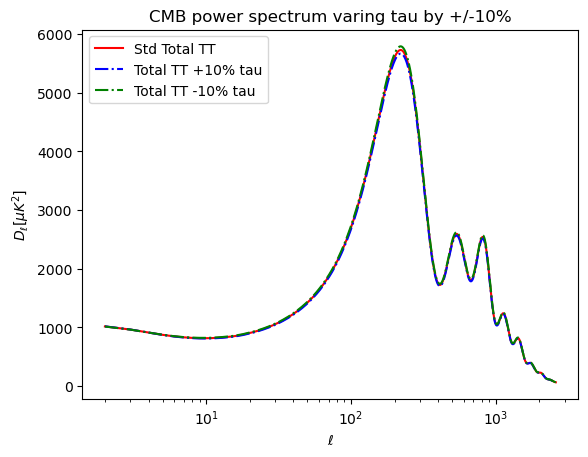

In [81]:
# Variang tau by +/-10%
tau_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
tau_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
tau_pars_plus.Reion.optical_depth *= 110./100.
tau_pars_minus.Reion.optical_depth *= 90./100.

# Calculate results for these parameters
tau_results_plus = camb.get_results(tau_pars_plus)
tau_results_minus = camb.get_results(tau_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
tau_powers_plus = tau_results_plus.get_cmb_power_spectra(tau_pars_plus, CMB_unit='muK')
tau_powers_minus = tau_results_minus.get_cmb_power_spectra(tau_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
tau_totCL_plus = tau_powers_plus['total']
tau_totCL_minus = tau_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],tau_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% tau')
plt.plot(ells[2:],tau_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% tau')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing tau by +/-10%')
plt.show()


**Varing tau in the Power Spectrum:** apparently, varing tau alters sligthtly the intensity of the perturbations as As would do. This implies that the 2 parameters are degenerate, i.e. it is possible to impose: 
$$
A_se^{-2\tau}=const
$$
and making varing the subspace of the 2 parameters.

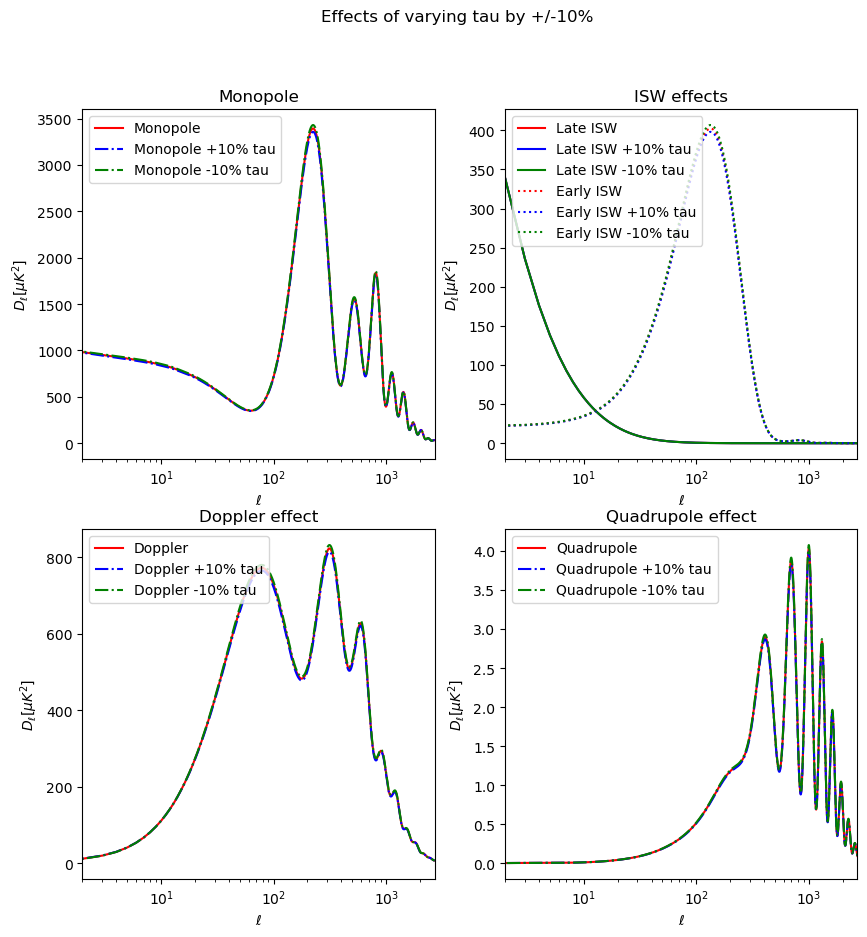

In [92]:
# PLots for the different effects having varied tau by +/-10%

tau_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
tau_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

tau_data_plus = camb.get_results(tau_pars_plus)
tau_data_minus = camb.get_results(tau_pars_minus)

tau_dic_plus  = tau_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
tau_dic_minus = tau_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

# PLots for the different effects having varied tau by +/-10%


# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying tau by +/-10%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,tau_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% tau','Monopole -10% tau'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,tau_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,tau_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,tau_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,tau_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% tau','Late ISW -10% tau','Early ISW','Early ISW +10% tau','Early ISW -10% tau'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,tau_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% tau','Doppler -10% tau'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,tau_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% tau','Quadrupole -10% tau'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.show()

**Varing tau in the different effects of the Power Spectrum:** apparently, varing tau varies the amplitude of the different effect even if not much. 

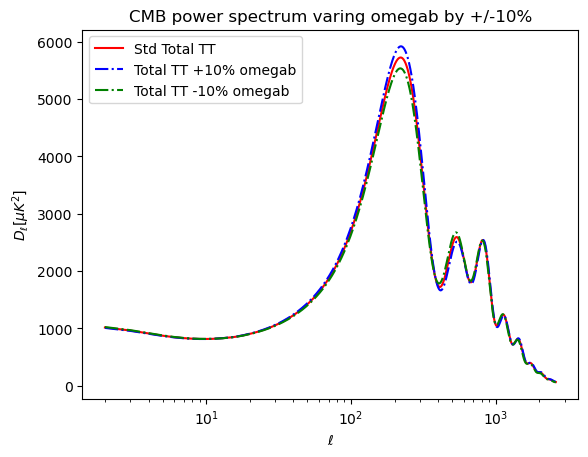

In [96]:
# Varing omegab by +/-10%
omegab_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
omegab_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

omegab_pars_plus.ombh2 *= 110./100.
omegab_pars_minus.ombh2 *= 90./100.

# Calculate results for these parameters
omegab_results_plus = camb.get_results(omegab_pars_plus)
omegab_results_minus = camb.get_results(omegab_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
omegab_powers_plus = omegab_results_plus.get_cmb_power_spectra(omegab_pars_plus, CMB_unit='muK')
omegab_powers_minus = omegab_results_minus.get_cmb_power_spectra(omegab_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
omegab_totCL_plus = omegab_powers_plus['total']
omegab_totCL_minus = omegab_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],omegab_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% omegab')
plt.plot(ells[2:],omegab_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% omegab')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing omegab by +/-10%')
plt.show()


In [95]:
pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_both
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 1.3464234
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2700
 max_l_tensor = 600
 max_eta_k = 18000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0223828
 omch2 = 0.1201075
 omk = 0.0
 omnuh2 = 0.0006451439
 H0 = 67.32117
 TCMB = 2.7255
 YHe = 0.2454006
 num_nu_massless = 2.046
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [0.0]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.9660499
   nrun = 0.0
   nrunrun = 0.0
 